<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/CV_1_Widi_Afandi_Visioner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Persiapan Data dan Library

In [1]:
import tensorflow as tf
import keras
# library untuk preprocessing dan modeling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
# library untuk download dataset cifar
from tensorflow.keras import datasets
# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

*download dataset*

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


*menampilkan data pada masing-masing kelas*

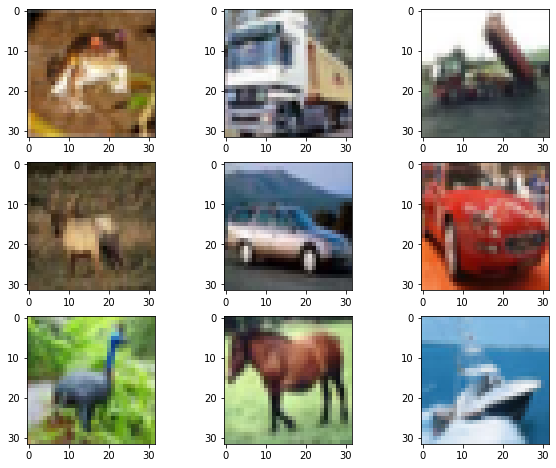

In [3]:
# setting ukuran graph
plt.rcParams["figure.figsize"] = (10,8)
for i in range(9):
	# subplot
	plt.subplot(330 + 1 + i)
	# tampilkan data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# 2. Data Preprocessing

*Normalisasi data*

In [4]:
#Normalize the pixel value to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Modeling

*model dengan menggunakan 3 lapis layer convlotional dan maxpooling serta flatten serta hidden layer 256 perceptron dan output 10 kelas.layer droput digunakan untuk menghindari overfitting.model menggunakan arsitektur vgg*

In [22]:
model = tf.keras.models.Sequential([
    # lapis 1                                
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # lapis 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    # lapis 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

*optimizer dan loss function dengan learning rater 0.001 dan momentum 0.9*

In [23]:
optimizers =  tf.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizers,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


*callbacks digunakan untuk menghentikan proses training ketika akuasi ada di 90%*

In [24]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      self.model.stop_training = True

callbacks = callback()

*training dengan data CIFAR-10*

In [19]:
history = model.fit(
    train_images, train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 64,
    validation_data = (test_images, test_labels),
    callbacks=[callbacks]
    )

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 20s 24ms/step - loss: 2.2373 - accuracy: 0.1541 - val_loss: 2.0524 - val_accuracy: 0.2532
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.9195 - accuracy: 0.2764 - val_loss: 1.7295 - val_accuracy: 0.3755
Epoch 3/100
782/782 [==============================] - 18s 24ms/step - loss: 1.7136 - accuracy: 0.3519 - val_loss: 1.5658 - val_accuracy: 0.4307
Epoch 4/100
782/782 [==============================] - 19s 24ms/step - loss: 1.6002 - accuracy: 0.3999 - val_loss: 1.4940 - val_accuracy: 0.4596
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.5300 - accuracy: 0.4317 - val_loss: 1.4047 - val_accuracy: 0.4836
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.4685 - accuracy: 0.4595 - val_loss: 1.4096 - val_accuracy: 0.4828
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.4128 - accuracy: 0.4805 - val_loss: 1.3424 - val_accuracy: 0.51

# 4. Evaluasi

*plot accuracy*

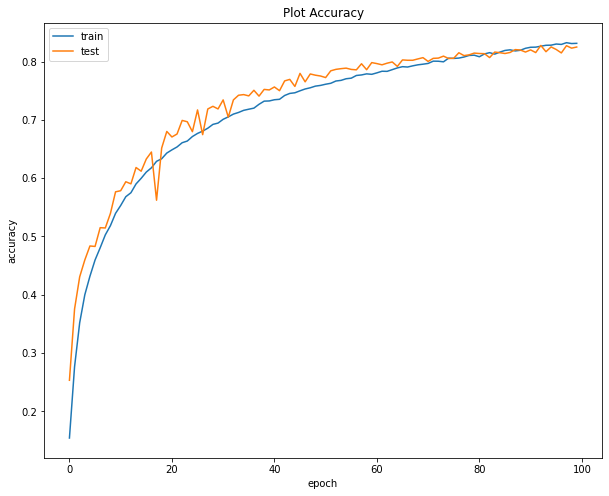

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'])
plt.title('Plot Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*plot loss*

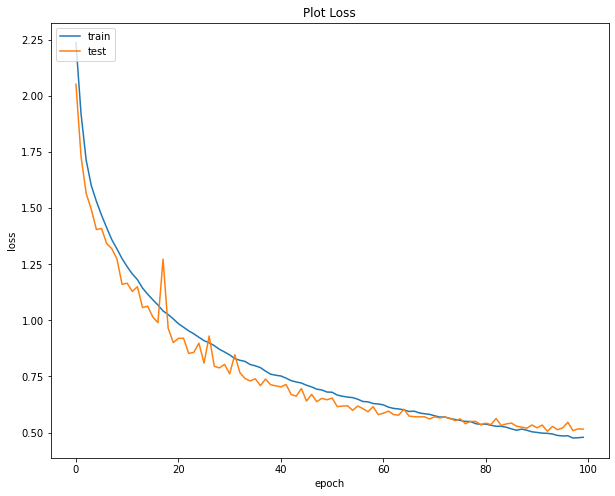

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Kesimpulan

Model CNN dengan baseline VGG menunjukan performa yang baik.Grafik menunjukan konvergen (menuju ke satu titik).Grafik akurasi setiap epoch mengalami peningkatan baik di data training ataupun test sedangkan grafik loss mengalami penurunan untuk setiap epoch.Akurasi yang di dapat pada data testing yaitu 82% dengan loss 51%.Hasil dari model ini pun tidak mengalami overfitting ataupun underfitting